In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('/Users/bhojraj/Downloads/Customer-Churn-Records.csv')

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [30]:
# checking for null values.
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [31]:
# checking for duplicate values
df.duplicated().sum()

0

In [32]:
# delete the un-necessary columns
df.drop(columns = ['RowNumber','CustomerId','Surname','Complain','Point Earned','Card Type','Satisfaction Score'], inplace = True)

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
# here is catagorical data into data set , we need to convert it into numeric data
df = pd.get_dummies(df,columns = ['Geography','Gender'], drop_first = True)

In [35]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [36]:
# split data into train nad test sets
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [38]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1


In [39]:
# we need to plot it using seaborn

<Axes: ylabel='Frequency'>

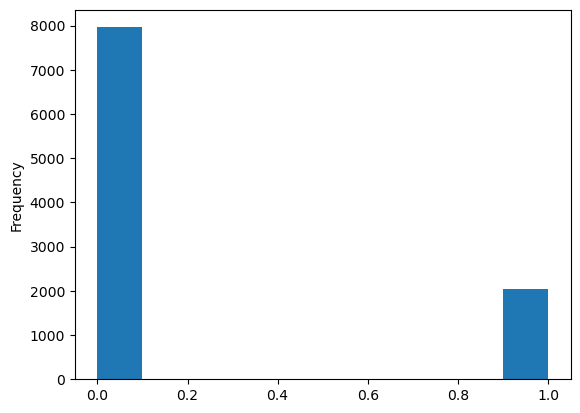

In [40]:
import seaborn as sns
df['Exited'].plot.hist()

In [41]:
# staying with the company:
(df['Exited']== 0).sum()

7962

In [42]:
# Exit the company
(df['Exited'] == 1).sum()

2038

In [43]:
# represent it in the heatmap

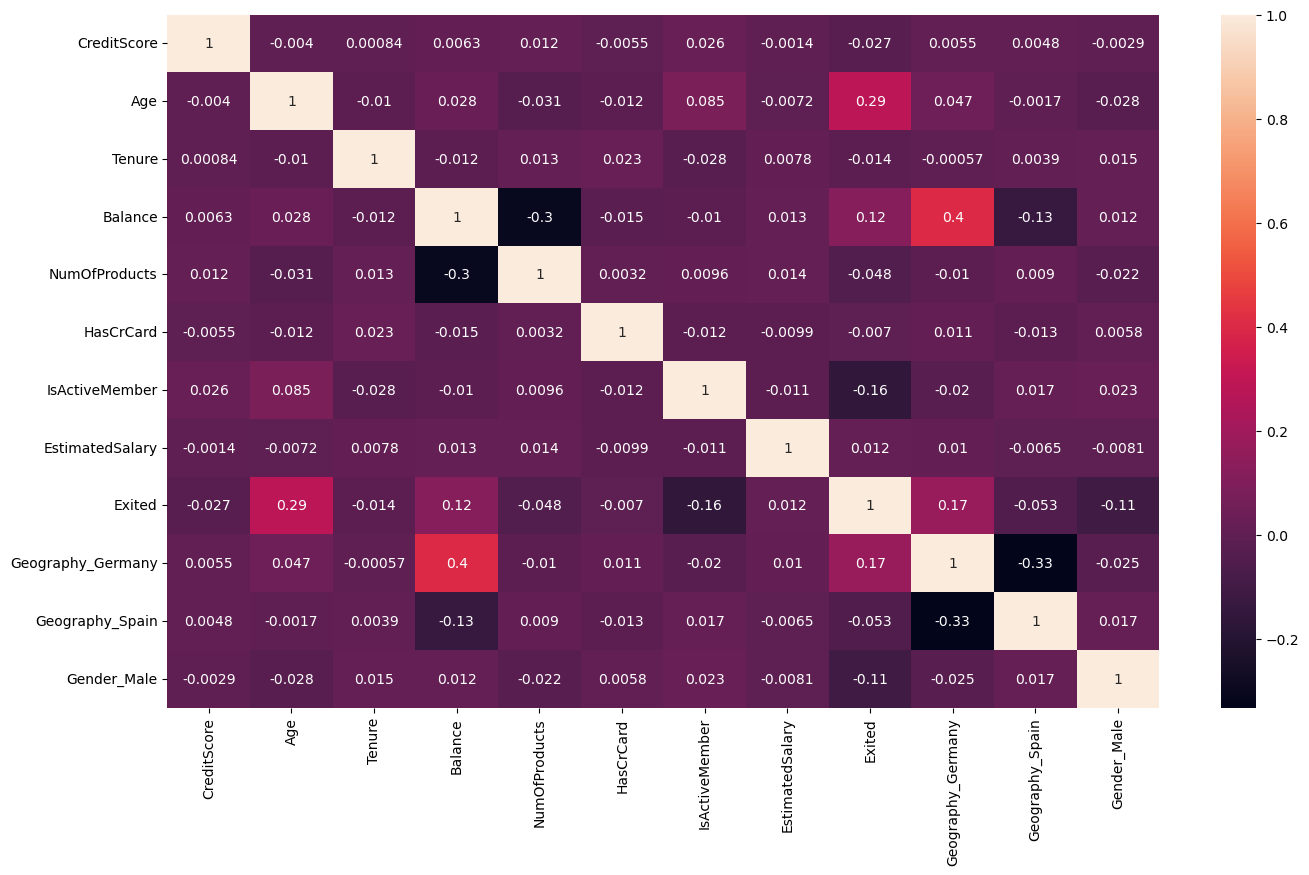

In [44]:
import matplotlib.pyplot as plt
correlation = df.corr()
plt.figure(figsize = (16,9))
sns.heatmap(correlation, annot = True)
plt.show()

In [45]:
# The data in dataset is not scalled , so we ned to saned the data 

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model = Sequential()

In [171]:
model.add(Dense(64,activation='sigmoid',input_dim=11))
model.add(Dense(32,activation = 'sigmoid', input_dim = 11))
model.add(Dense(1,activation = 'sigmoid'))

In [172]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
 dense_2 (Dense)             (None, 11)                22        
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
 dense_4 (Dense)             (None, 11)                22        
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
 dense_6 (Dense)             (None, 11)               

In [173]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [174]:
history = model.fit(X_train_scaled,y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
200/200 [==============================] - 1s 1ms/step - loss: 0.5227 - accuracy: 0.7773 - val_loss: 0.5051 - val_accuracy: 0.7975
Epoch 2/10
200/200 [==============================] - 0s 851us/step - loss: 0.5059 - accuracy: 0.7970 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 3/10
200/200 [==============================] - 0s 843us/step - loss: 0.5050 - accuracy: 0.7970 - val_loss: 0.5055 - val_accuracy: 0.7975
Epoch 4/10
200/200 [==============================] - 0s 844us/step - loss: 0.5057 - accuracy: 0.7970 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 5/10
200/200 [==============================] - 0s 838us/step - loss: 0.5057 - accuracy: 0.7970 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 6/10
200/200 [==============================] - 0s 858us/step - loss: 0.5053 - accuracy: 0.7970 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 7/10
200/200 [==============================] - 0s 828us/step - loss: 0.5055 - accuracy: 0.7970 - val_loss: 0.5043 - val_accuracy: 0

In [175]:
model.layers[1].get_weights()

[array([[ 0.36371428],
        [-0.3203109 ],
        [-0.7036376 ],
        [-0.53592783],
        [ 1.0025285 ],
        [ 1.2389714 ],
        [ 0.6086415 ],
        [ 0.92493445],
        [-0.31587008],
        [-0.3783927 ],
        [-0.7772078 ]], dtype=float32),
 array([0.08788217], dtype=float32)]

In [176]:
y_pred = model.predict(X_test_scaled)

63/63 [==============================] - 0s 356us/step


In [177]:
y_pred

array([[0.21183778],
       [0.21183778],
       [0.21183778],
       ...,
       [0.21183778],
       [0.21183778],
       [0.21183778]], dtype=float32)

In [178]:
# make a threshold to convert the output into binary.

In [179]:
y_pred = np.where(y_pred>0.5,1,0)

In [180]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
accuracy = accuracy_score(y_test,y_pred)

In [183]:
accuracy

0.7925

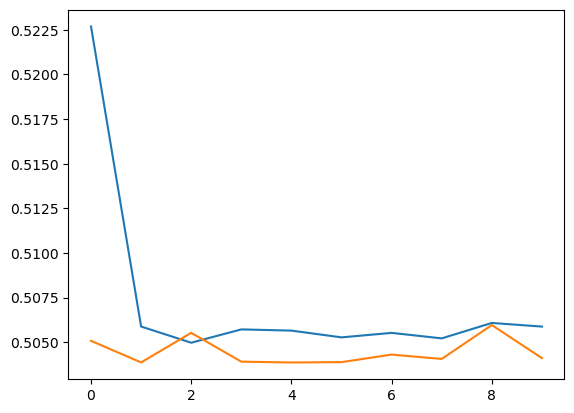

In [184]:
# to see how our model reduces the loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

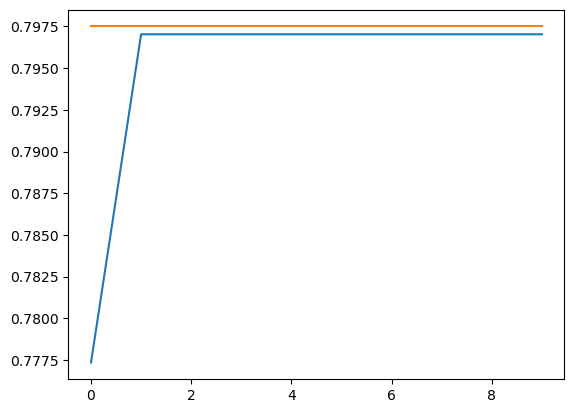

In [185]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])